### BaseBall Hall Of Fame 

##### Source of dataset
- https://github.com/RyanNolanData/YouTubeData/blob/main/500hits.csv

#### Importing the Neccessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('500hits.csv', encoding='latin-1')

In [4]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [40]:
correlation = df.corr()

<Axes: >

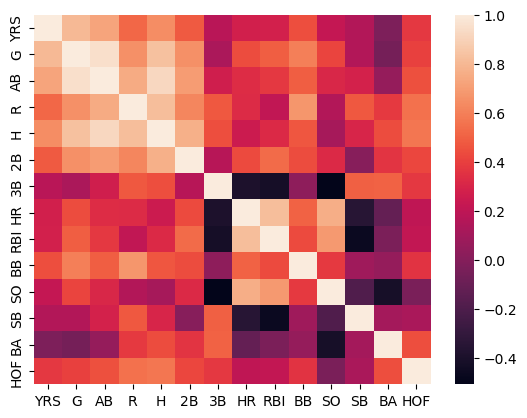

In [45]:
sns.heatmap(correlation)

In [19]:
df.drop(['PLAYER', 'CS'], axis= 1, inplace=True)

#### Spliting the Data into Independent and Dependent Variables

In [20]:
X = df.drop(['HOF'] ,axis= 1)
y = df['HOF']

In [23]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_scaled = SS.fit_transform(X)

1.0

#### Train test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 42)

#### Model Building

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

#### Model Evaluation


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7956989247311828
[[52 10]
 [ 9 22]]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        62
           1       0.69      0.71      0.70        31

    accuracy                           0.80        93
   macro avg       0.77      0.77      0.77        93
weighted avg       0.80      0.80      0.80        93



In [32]:
dtc.feature_importances_

array([0.02264997, 0.02193153, 0.03922742, 0.34088327, 0.08264963,
       0.00976026, 0.03599095, 0.03273422, 0.0949626 , 0.05700948,
       0.06184149, 0.03861651, 0.16174268])

In [34]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns)
features


,0
YRS,0.022650
G,0.021932
AB,0.039227
R,0.340883
H,0.082650
2B,0.009760
3B,0.035991
HR,0.032734
RBI,0.094963
BB,0.057009
